In [1]:
# Import Library
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re
import nltk
from nltk.tokenize import word_tokenize 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#import data
df=pd.read_excel('Hatespeech Dataset.xlsx')
df

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [3]:
#mengganti label menjadi 1 dan 0
df['Label'].replace('HS',1, inplace=True)
df['Label'].replace('Non_HS',0,inplace=True)
df

,Label,Tweet
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,1,"Betul bang hancurkan merka bang, musnahkan chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [4]:
#merubah semua kata menjadi huruf kecil
df['Lowercase']=df['Tweet'].str.lower()
df

,Label,Tweet,Lowercase
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,rt @spardaxyz: fadli zon minta mendagri segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,rt @baguscondromowo: mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","ahmad dhani tak puas debat pilkada, masalah ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,rt @lisdaulay28: waspada ktp palsu.....kawal p...
...,...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,muka si babi ahok tuh yg mirip serbet lantai.....
709,1,"Betul bang hancurkan merka bang, musnahkan chi...","betul bang hancurkan merka bang, musnahkan chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...","sapa yg bilang ahok anti korupsi!?, klo grombo..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...","gw juga ngimpi sentilin biji babi ahok, pcetar..."


# TEXT CLEANING / TEXT PREPROCESSING

In [5]:
#menghapus karakter spesial
def remove_specialchar(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = text.replace("http://", " ").replace("https://", " ")
    return text
df['remove']=df['Lowercase'].apply(remove_specialchar)
#menghapus nomor
def remove_numb(text):
    text=re.sub(r'\d+','', text)
    return text
df['remove']=df['remove'].apply(remove_numb)
#menghapus spasi
def remove_space(text):
    text=text.strip()
    return text
df['remove']=df['remove'].apply(remove_space)

def remove_space2(text):
    text=re.sub('\s+',' ',text)
    return text
df['remove']=df['remove'].apply(remove_space2)
#menghapus huruf yang berdiri sendiri
def remove_single(text):
    text=re.sub(r"\b[a-zA-Z]\b", "", text)
    return text
df['remove']=df['remove'].apply(remove_single)
#menghapus tanda baca
def remove_punctuation(text):
    text = text.translate(str.maketrans("","",string.punctuation))
    return text
df['remove']=df['remove'].apply(remove_punctuation)
#tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
df['Tokenize']=df['remove'].apply(tokenize)
df.head()

,Label,Tweet,Lowercase,remove,Tokenize
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,rt @spardaxyz: fadli zon minta mendagri segera...,rt fadli zon minta mendagri segera menonaktif...,"[rt, fadli, zon, minta, mendagri, segera, meno..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,rt @baguscondromowo: mereka terus melukai aksi...,rt mereka terus melukai aksi dalam rangka mem...,"[rt, mereka, terus, melukai, aksi, dalam, rang..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","ahmad dhani tak puas debat pilkada, masalah ja...",ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,rt @lisdaulay28: waspada ktp palsu.....kawal p...,rt waspada ktp palsukawal pilkada,"[rt, waspada, ktp, palsukawal, pilkada]"


In [6]:
#melakukan stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['Stemming'] = df['Tokenize'].apply(lambda x: [stemmer.stem(y) for y in x])
df

,Label,Tweet,Lowercase,remove,Tokenize,Stemming
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,rt @spardaxyz: fadli zon minta mendagri segera...,rt fadli zon minta mendagri segera menonaktif...,"[rt, fadli, zon, minta, mendagri, segera, meno...","[rt, fadli, zon, minta, mendagri, segera, nona..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,rt @baguscondromowo: mereka terus melukai aksi...,rt mereka terus melukai aksi dalam rangka mem...,"[rt, mereka, terus, melukai, aksi, dalam, rang...","[rt, mereka, terus, luka, aksi, dalam, rangka,..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","ahmad dhani tak puas debat pilkada, masalah ja...",ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,rt @lisdaulay28: waspada ktp palsu.....kawal p...,rt waspada ktp palsukawal pilkada,"[rt, waspada, ktp, palsukawal, pilkada]","[rt, waspada, ktp, palsukawal, pilkada]"
...,...,...,...,...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,muka si babi ahok tuh yg mirip serbet lantai.....,muka si babi ahok tuh yg mirip serbet lantai btp,"[muka, si, babi, ahok, tuh, yg, mirip, serbet,...","[muka, si, babi, ahok, tuh, yg, mirip, serbet,..."
709,1,"Betul bang hancurkan merka bang, musnahkan chi...","betul bang hancurkan merka bang, musnahkan chi...",betul bang hancurkan merka bang musnahkan chin...,"[betul, bang, hancurkan, merka, bang, musnahka...","[betul, bang, hancur, merka, bang, musnah, chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...","sapa yg bilang ahok anti korupsi!?, klo grombo...",sapa yg bilang ahok anti korupsi klo grombolan...,"[sapa, yg, bilang, ahok, anti, korupsi, klo, g...","[sapa, yg, bilang, ahok, anti, korupsi, klo, g..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...","gw juga ngimpi sentilin biji babi ahok, pcetar...",gw juga ngimpi sentilin biji babi ahok pcetar ...,"[gw, juga, ngimpi, sentilin, biji, babi, ahok,...","[gw, juga, ngimpi, sentilin, biji, babi, ahok,..."


In [7]:
#Stopword
stopword=stopwords.words('indonesian')
stopword.extend(['nya', 'rt','gt','y','ny','yg','jd','masa','tul','pars','gokil','pgn','pen','udh','uda','jgn','hehe','hh','tdk'
                ,'gk','g','ga','loh','bikin','in','ye','u','w'])
stopword = set(stopword)

def removestop(words):
    words = [word for word in words if word not in stopword]
    return words
df['Stopword'] = df['Stemming'].apply(removestop)
df

,Label,Tweet,Lowercase,remove,Tokenize,Stemming,Stopword
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,rt @spardaxyz: fadli zon minta mendagri segera...,rt fadli zon minta mendagri segera menonaktif...,"[rt, fadli, zon, minta, mendagri, segera, meno...","[rt, fadli, zon, minta, mendagri, segera, nona...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,rt @baguscondromowo: mereka terus melukai aksi...,rt mereka terus melukai aksi dalam rangka mem...,"[rt, mereka, terus, melukai, aksi, dalam, rang...","[rt, mereka, terus, luka, aksi, dalam, rangka,...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","ahmad dhani tak puas debat pilkada, masalah ja...",ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,rt @lisdaulay28: waspada ktp palsu.....kawal p...,rt waspada ktp palsukawal pilkada,"[rt, waspada, ktp, palsukawal, pilkada]","[rt, waspada, ktp, palsukawal, pilkada]","[waspada, ktp, palsukawal, pilkada]"
...,...,...,...,...,...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,muka si babi ahok tuh yg mirip serbet lantai.....,muka si babi ahok tuh yg mirip serbet lantai btp,"[muka, si, babi, ahok, tuh, yg, mirip, serbet,...","[muka, si, babi, ahok, tuh, yg, mirip, serbet,...","[muka, si, babi, ahok, tuh, serbet, lantai, btp]"
709,1,"Betul bang hancurkan merka bang, musnahkan chi...","betul bang hancurkan merka bang, musnahkan chi...",betul bang hancurkan merka bang musnahkan chin...,"[betul, bang, hancurkan, merka, bang, musnahka...","[betul, bang, hancur, merka, bang, musnah, chi...","[bang, hancur, merka, bang, musnah, china, bab..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...","sapa yg bilang ahok anti korupsi!?, klo grombo...",sapa yg bilang ahok anti korupsi klo grombolan...,"[sapa, yg, bilang, ahok, anti, korupsi, klo, g...","[sapa, yg, bilang, ahok, anti, korupsi, klo, g...","[sapa, bilang, ahok, anti, korupsi, klo, gromb..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...","gw juga ngimpi sentilin biji babi ahok, pcetar...",gw juga ngimpi sentilin biji babi ahok pcetar ...,"[gw, juga, ngimpi, sentilin, biji, babi, ahok,...","[gw, juga, ngimpi, sentilin, biji, babi, ahok,...","[gw, ngimpi, sentilin, biji, babi, ahok, pceta..."


In [8]:
#file yang sudah dilakukan text cleaning
df['Ready']=df['Stopword'].apply(' '.join)
df

,Label,Tweet,Lowercase,remove,Tokenize,Stemming,Stopword,Ready
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,rt @spardaxyz: fadli zon minta mendagri segera...,rt fadli zon minta mendagri segera menonaktif...,"[rt, fadli, zon, minta, mendagri, segera, meno...","[rt, fadli, zon, minta, mendagri, segera, nona...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,rt @baguscondromowo: mereka terus melukai aksi...,rt mereka terus melukai aksi dalam rangka mem...,"[rt, mereka, terus, melukai, aksi, dalam, rang...","[rt, mereka, terus, luka, aksi, dalam, rangka,...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pilkada
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku keras perempuan bukti fot...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","ahmad dhani tak puas debat pilkada, masalah ja...",ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, puas, debat, pilkada, jalan, be...",ahmad dhani puas debat pilkada jalan bekas
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,rt @lisdaulay28: waspada ktp palsu.....kawal p...,rt waspada ktp palsukawal pilkada,"[rt, waspada, ktp, palsukawal, pilkada]","[rt, waspada, ktp, palsukawal, pilkada]","[waspada, ktp, palsukawal, pilkada]",waspada ktp palsukawal pilkada
...,...,...,...,...,...,...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,muka si babi ahok tuh yg mirip serbet lantai.....,muka si babi ahok tuh yg mirip serbet lantai btp,"[muka, si, babi, ahok, tuh, yg, mirip, serbet,...","[muka, si, babi, ahok, tuh, yg, mirip, serbet,...","[muka, si, babi, ahok, tuh, serbet, lantai, btp]",muka si babi ahok tuh serbet lantai btp
709,1,"Betul bang hancurkan merka bang, musnahkan chi...","betul bang hancurkan merka bang, musnahkan chi...",betul bang hancurkan merka bang musnahkan chin...,"[betul, bang, hancurkan, merka, bang, musnahka...","[betul, bang, hancur, merka, bang, musnah, chi...","[bang, hancur, merka, bang, musnah, china, bab...",bang hancur merka bang musnah china babi bumi ...
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...","sapa yg bilang ahok anti korupsi!?, klo grombo...",sapa yg bilang ahok anti korupsi klo grombolan...,"[sapa, yg, bilang, ahok, anti, korupsi, klo, g...","[sapa, yg, bilang, ahok, anti, korupsi, klo, g...","[sapa, bilang, ahok, anti, korupsi, klo, gromb...",sapa bilang ahok anti korupsi klo grombolannya...
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...","gw juga ngimpi sentilin biji babi ahok, pcetar...",gw juga ngimpi sentilin biji babi ahok pcetar ...,"[gw, juga, ngimpi, sentilin, biji, babi, ahok,...","[gw, juga, ngimpi, sentilin, biji, babi, ahok,...","[gw, ngimpi, sentilin, biji, babi, ahok, pceta...",gw ngimpi sentilin biji babi ahok pcetar pceta...


# Klasifikasi

In [9]:
#split dan penamaan data
X_train, X_test, y_train, y_test = train_test_split(df['Ready'], df['Label'], random_state=0, train_size=0.8)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(570,)
(143,)
(570,)
(143,)


In [10]:

#feature extraction
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

#transform training dan testing data menggunakan vectorizer
X_train_vectorized = vectorizer.transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()

## Naive Bayes

### Gaussian Naive Bayes 

In [11]:

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train_vectorized, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test_vectorized)

In [12]:
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[63, 23],
       [18, 39]], dtype=int64)

In [13]:
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7132867132867133
Precision: 0.6290322580645161
Recall: 0.6842105263157895
F1 Score: 0.6554621848739496
Cohens Kappa Score: 0.41069454216504175


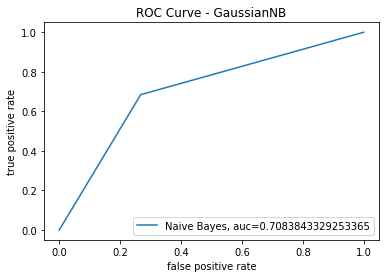

In [14]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test_vectorized)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - GaussianNB')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Multinomial Naive Bayes

In [15]:

# Modeling Naive Bayes Classifier
mnm = naive_bayes.MultinomialNB()
mnm.fit(X_train_vectorized, y_train)

# Predict to Test Data
y_pred_mnm= mnm.predict(X_test_vectorized)

In [16]:
# Show the Confussion Matrix
cm_mnm = metrics.confusion_matrix(y_test, y_pred_mnm)
cm_mnm

array([[85,  1],
       [25, 32]], dtype=int64)

In [17]:
# Show the Accuracy, Precision, Recall
acc_mnm = metrics.accuracy_score(y_test, y_pred_mnm)
prec_mnm = metrics.precision_score(y_test, y_pred_mnm)
rec_mnm = metrics.recall_score(y_test, y_pred_mnm)
f1_mnm = metrics.f1_score(y_test, y_pred_mnm)
kappa_mnm = metrics.cohen_kappa_score(y_test, y_pred_mnm)

print("Accuracy:", acc_mnm)
print("Precision:", prec_mnm)
print("Recall:", rec_mnm)
print("F1 Score:", f1_mnm)
print("Cohens Kappa Score:", kappa_mnm)

Accuracy: 0.8181818181818182
Precision: 0.9696969696969697
Recall: 0.5614035087719298
F1 Score: 0.711111111111111
Cohens Kappa Score: 0.5917874396135265


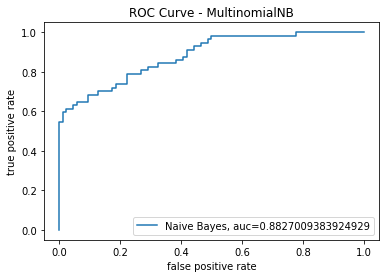

In [18]:
# ROC Curve
y_pred_mnm_proba = mnm.predict_proba(X_test_vectorized)[::,1]
fprmnm, tprmnm, _ = metrics.roc_curve(y_test,  y_pred_mnm_proba)
aucmnm = metrics.roc_auc_score(y_test, y_pred_mnm_proba)
plt.plot(fprmnm,tprmnm,label="Naive Bayes, auc="+str(aucmnm))
plt.title('ROC Curve - MultinomialNB')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## Random Forest 

In [19]:
# Import Module
from sklearn.ensemble import RandomForestClassifier

# Modeling Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train_vectorized, y_train)

# Predict to Test Data
y_pred_rfc= rfc.predict(X_test_vectorized)

In [20]:
# Show the Confussion Matrix
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[84,  2],
       [21, 36]], dtype=int64)

In [21]:
# Show the Accuracy, Precision, Recall
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
prec_rfc = metrics.precision_score(y_test, y_pred_rfc)
rec_rfc = metrics.recall_score(y_test, y_pred_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc)
kappa_rfc = metrics.cohen_kappa_score(y_test, y_pred_rfc)

print("Accuracy:", acc_rfc)
print("Precision:", prec_rfc)
print("Recall:", rec_rfc)
print("F1 Score:", f1_rfc)
print("Cohens Kappa Score:", kappa_rfc)

Accuracy: 0.8391608391608392
Precision: 0.9473684210526315
Recall: 0.631578947368421
F1 Score: 0.7578947368421052
Cohens Kappa Score: 0.6445477142548363


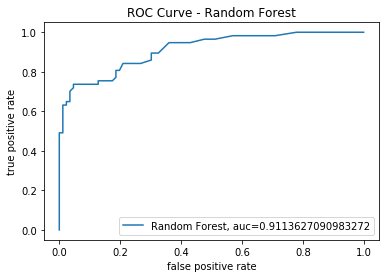

In [22]:
y_pred_rfc_proba = rfc.predict_proba(X_test_vectorized)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## KNNeighbors

In [23]:
# Modeling KNN
knn = KNeighborsClassifier()
knn.fit(X_train_vectorized, y_train)

# Predict to Test Data
y_pred_knn= knn.predict(X_test_vectorized)

In [24]:
# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[78,  8],
       [23, 34]], dtype=int64)

In [25]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn)
rec_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7832167832167832
Precision: 0.8095238095238095
Recall: 0.5964912280701754
F1 Score: 0.6868686868686869
Cohens Kappa Score: 0.526843846728573


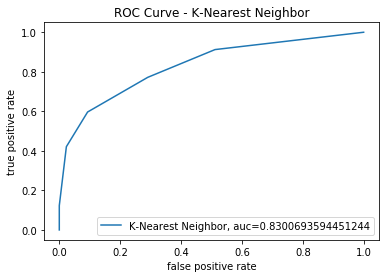

In [26]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test_vectorized)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.title('ROC Curve - K-Nearest Neighbor')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## Membandingkan ROC Curve

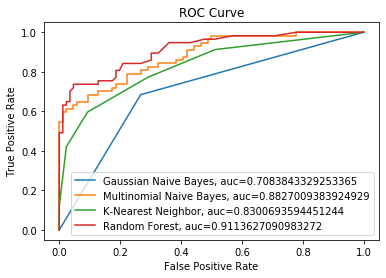

In [27]:
plt.plot(fprgnb,tprgnb,label="Gaussian Naive Bayes, auc="+str(aucgnb))
plt.plot(fprmnm,tprmnm,label="Multinomial Naive Bayes, auc="+str(aucmnm))
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Kesimpulan
Dari kurva bisa dilihat, dari 4 model klasifikasi yang digunakan, model klasifikasi text terbaik untuk dataset ini adalah Random Forest karena memiliki nilai tertinggi 
